In [2]:
import tensorflow as tf

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [108]:
print(tf.__version__)

2.1.0-dev20191128


# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

# STEP 2 : DATA PREPROCESSING

We have to scale x_train and x_test so that all values are in the [0, 1] interval. **Why do we need to scale ?** goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.





In [111]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [113]:
x_train.ndim

3

# STEP 4 : COMPILATION

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL

In [8]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2972 - accuracy: 0.9127
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1418 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1059 - accuracy: 0.9681
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0858 - accuracy: 0.9734
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0729 - accuracy: 0.9773


# STEP 6 : EVALUATE THE TRAINING 

### Now let’s check that the model performs well on the test set, too:

In [9]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/10000 - 1s - loss: 0.0741 - accuracy: 0.9787


In [11]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07406501457060222
0.9787


# STEP 7 (optional) : PREDICTION

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')
model.predict_classes(x_test[90].reshape(1, 28, 28 ))


array([3], dtype=int64)

In [13]:
model.predict_classes(x_test[7].reshape(1,28,28))

array([9], dtype=int64)

In [14]:
y_test[7]

9

In [5]:
import numpy as np
X=np.array([2,4,6,8])
Y=np.array([5,10,15,20])
b=0

#  y=mx+b
#  m=(y-b)/x
#  matho if b=0 m=y/x
M=Y/X
print(M)
m = M.mean()
print(m)
x = 7
y = m*x
print(y)

[2.5 2.5 2.5 2.5]
2.5
17.5


In [7]:
import matplotlib.pyplot as plt

#plt.scatter(X,Y)
start=X[0]
end = X[-1]
x=np.linspace(start,end,10)
#print(x)
#print(slope)
y=x* m
#plt.plot(x,y)
#plt.show()
print(y)


[ 5.          6.66666667  8.33333333 10.         11.66666667 13.33333333
 15.         16.66666667 18.33333333 20.        ]


In [27]:
X=np.array([2,3,4,5,6,7,8,9,10])
Y=np.array([40,50,60,60,70,80,90,100,100])
M=Y/X
print('Slope:',M)
slope=M.mean()
print('average slope', slope)
x=3
y=slope * x
print(y)

Slope: [20.         16.66666667 15.         12.         11.66666667 11.42857143
 11.25       11.11111111 10.        ]
average slope 13.23589065255732
39.70767195767196


[2.         2.66666667 3.33333333 4.         4.66666667 5.33333333
 6.         6.66666667 7.33333333 8.        ]
2.5


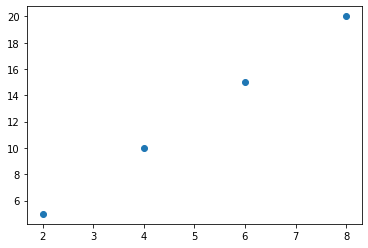

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
start=X[0]
end = X[-1]
x=np.linspace(start,end,10)
print(x)
print(m)
y=x* m
plt.plot(x,y)
plt.show()


In [2]:
import numpy as np
X=np.array([2,4,6,8])
Y=np.array([5,10,15,20])
b=0

#  y=mx+b
#  m=(y-b)/x
#  matho if b=0 m=y/x
M=Y/X
print(M)
m = M.mean()
print(m)
x = 7
y = m*x
print(y)

[2.5 2.5 2.5 2.5]
2.5
17.5


[2.         2.66666667 3.33333333 4.         4.66666667 5.33333333
 6.         6.66666667 7.33333333 8.        ]
2.5


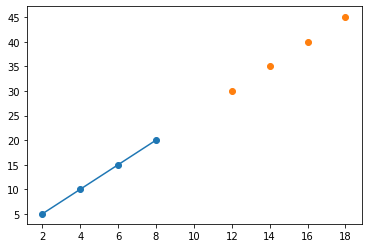

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
start=X[0]
end = X[-1]
X_new=np.array([12,14,16,18])
Y_new=X_new*m
x=np.linspace(start,end,10)
print(x)
print(m)
y=x* m
plt.plot(x,y)
plt.scatter(X_new,Y_new)
plt.show()


In [50]:
X=np.array([2,3,4,5,6,7,8,9,10])
Y=np.array([40,50,60,60,70,80,90,100,100])
M=Y/X
print('Slope:',M)
slope=M.mean()
print('average slope', slope)
x=3
y=slope * x
print(y)

Slope: [20.         16.66666667 15.         12.         11.66666667 11.42857143
 11.25       11.11111111 10.        ]
average slope 13.23589065255732
39.70767195767196


[ 2.  4.  6.  8. 10.]
13.23589065255732


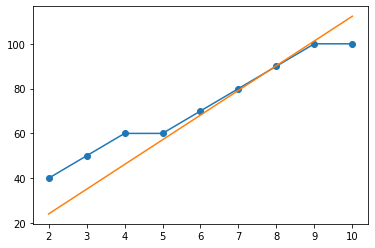

In [97]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
start=X[0]
end = X[-1]
x=np.linspace(start,end,5)
print(x) 
print(slope)++
y=x* (slope/1.2)+2
plt.plot(X,Y)
#plt.scatter(x,y)
plt.plot(x,y)
#plt.show()


In [117]:
import pandas as pd
data=pd.read_csv('http://bit.ly/movieusers', sep='|',index_col=['1','24'],chunksize=100,)
display(data)
for d in data:
    display(d)


,,M,technician,85711
1,24,,,
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
...,...,...,...,...
97,43,M,artist,98006
98,49,F,executive,90291
99,20,M,student,63129


,,M,technician,85711
1,24,,,
102,38,M,programmer,30220
103,26,M,student,55108
104,27,M,student,55108
105,24,M,engineer,94043
106,61,M,retired,55125
...,...,...,...,...
197,55,M,technician,75094
198,21,F,student,55414
199,30,M,writer,17604


,,M,technician,85711
1,24,,,
202,41,F,educator,60201
203,25,F,student,32301
204,52,F,librarian,10960
205,47,M,lawyer,6371
206,14,F,student,53115
...,...,...,...,...
297,29,F,educator,98103
298,44,M,executive,1581
299,29,M,doctor,63108


,,M,technician,85711
1,24,,,
302,42,M,educator,77904
303,19,M,student,14853
304,22,F,student,71701
305,23,M,programmer,94086
306,45,M,other,73132
...,...,...,...,...
397,17,M,student,27514
398,40,M,other,60008
399,25,M,other,92374


,,M,technician,85711
1,24,,,
402,30,M,engineer,95129
403,37,M,other,06811
404,29,F,programmer,55108
405,22,F,healthcare,10019
406,52,M,educator,93109
...,...,...,...,...
497,20,M,student,50112
498,26,M,writer,55408
499,42,M,programmer,75006


,,M,technician,85711
1,24,,,
502,22,M,student,23092
503,50,F,writer,27514
504,40,F,writer,92115
505,27,F,other,20657
506,46,M,programmer,03869
...,...,...,...,...
597,23,M,other,84116
598,40,F,marketing,43085
599,22,F,student,R3T5K


,,M,technician,85711
1,24,,,
602,47,F,other,34656
603,21,M,programmer,47905
604,39,M,educator,11787
605,33,M,engineer,33716
606,28,M,programmer,63044
...,...,...,...,...
697,25,M,other,77042
698,28,F,programmer,06906
699,44,M,other,96754


,,M,technician,85711
1,24,,,
702,37,M,other,89104
703,26,M,educator,49512
704,51,F,librarian,91105
705,21,F,student,54494
706,23,M,student,55454
...,...,...,...,...
797,44,F,other,62522
798,40,F,writer,64131
799,49,F,administrator,19716


,,M,technician,85711
1,24,,,
802,35,M,administrator,34105
803,70,M,administrator,78212
804,39,M,educator,61820
805,27,F,other,20009
806,27,M,marketing,11217
...,...,...,...,...
897,30,M,other,33484
898,23,M,homemaker,61755
899,32,M,other,55116


,,M,technician,85711
1,24,,,
902,45,F,artist,97203
903,28,M,educator,20850
904,17,F,student,61073
905,27,M,other,30350
906,45,M,librarian,70124
907,25,F,other,80526
908,44,F,librarian,68504
909,50,F,educator,53171
910,28,M,healthcare,29301


In [106]:
list1=[[1,2],[2,3]]
np.array(list1).shape

(2, 2)

In [1]:
#Mean Square Error = Loss Function
#softmax = for multiple labels/ multi class classification/ collect the highest probability by labels
#relu = 
#verbose = if 1 means epox will show if 0 not show
#argmax is return index of data
#make a function and send outside data and also predict if the model is working correctly